In [ ]:
!pip install kaggle

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
import string
import re


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB


In [ ]:
!pip install kaggle


In [ ]:
!mkdir -p ~/.kaggle


In [ ]:
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d niraliivaghani/flipkart-dataset


Dataset URL: https://www.kaggle.com/datasets/niraliivaghani/flipkart-dataset
License(s): ODbL-1.0
 64% 5.00M/7.85M [00:00<00:00, 37.4MB/s]
100% 7.85M/7.85M [00:00<00:00, 52.5MB/s]


In [ ]:
!unzip /content/flipkart-dataset.zip -d /content/flipkart-dataset



Archive:  /content/flipkart-dataset.zip
  inflating: /content/flipkart-dataset/Dataset.csv  


In [ ]:
df = pd.read_csv('/content/flipkart-dataset/Dataset.csv', encoding='ISO-8859-1')



<ipython-input-11-e86ae85274e8>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/flipkart-dataset/Dataset.csv', encoding='ISO-8859-1')


In [ ]:
df.head()

,Product_name,Price,Rate,Review,Summary
0,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",5,Simply awesome,it's really worth every single penny. it works...
1,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",4,Worth the money . Desert Cooler live up to the...,I bought Crompton Ozone 75 Desert Air Cooler i...
2,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",5,Worth every penny,GREAT packaging by seller. As this was the mos...
3,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",5,Fabulous!,Delivery was delayed by two days except this e...
4,"Crompton 75 L Desert Air Cooler??(White, Tea...","??10,499",4,Nice product,A Good cooler by Crompton. The height of the c...


In [ ]:
df.shape

(363261, 5)

In [ ]:
data1 = df[['Summary', 'Rate']]
data1.head()

,Summary,Rate
0,it's really worth every single penny. it works...,5
1,I bought Crompton Ozone 75 Desert Air Cooler i...,4
2,GREAT packaging by seller. As this was the mos...,5
3,Delivery was delayed by two days except this e...,5
4,A Good cooler by Crompton. The height of the c...,4


Count each rating


In [ ]:
data1.Rate.value_counts()

,count
Rate,
5,146763
5.0,57069
4,53843
1,28375
3,23763
4.0,20409
1.0,11702
2,9379
3.0,8335


In [ ]:
data1['Rate'] = pd.to_numeric(data1['Rate'], errors='coerce')

<ipython-input-16-8509e0d6a8cf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Rate'] = pd.to_numeric(data1['Rate'], errors='coerce')


In [ ]:
data1 = data1[(data1['Rate'] >= 1) & (data1['Rate'] <= 5)]

In [ ]:
data1 = data1.dropna(subset=['Summary'])
data1 = data1[data1['Summary'].str.strip() != '']

In [ ]:
data1.reset_index(drop=True, inplace=True)

In [ ]:
data1.head()

,Summary,Rate
0,it's really worth every single penny. it works...,5.0
1,I bought Crompton Ozone 75 Desert Air Cooler i...,4.0
2,GREAT packaging by seller. As this was the mos...,5.0
3,Delivery was delayed by two days except this e...,5.0
4,A Good cooler by Crompton. The height of the c...,4.0


In [ ]:
data1.Rate.value_counts()

,count
Rate,
5.0,202705
4.0,73860
1.0,39892
3.0,31871
2.0,12905


In [ ]:
def map_review(x) :
  if x<3:
    return 'Negative'
  elif x == 3:
    return 'Neutral'
  else:
    return 'Positive'

In [ ]:
data1['Review'] = data1['Rate'].apply(lambda x:map_review(x))

In [ ]:
data1.head()

,Summary,Rate,Review
0,it's really worth every single penny. it works...,5.0,Positive
1,I bought Crompton Ozone 75 Desert Air Cooler i...,4.0,Positive
2,GREAT packaging by seller. As this was the mos...,5.0,Positive
3,Delivery was delayed by two days except this e...,5.0,Positive
4,A Good cooler by Crompton. The height of the c...,4.0,Positive


In [ ]:
data1.Review.value_counts()

,count
Review,
Positive,276565
Negative,52797
Neutral,31871


In [ ]:
data1 = data1.sample(n=6000, random_state=42)
print(data1.shape)

(6000, 3)


In [ ]:
data1.Review.value_counts()

,count
Review,
Positive,4606
Negative,861
Neutral,533


In [ ]:
!pip install nltk

In [ ]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import nltk
from nltk.corpus import stopwords
stopwords_list = stopwords.words('english')
total_stopwords = set(stopwords_list)
negative_stop_words = {word for word in total_stopwords if "n't" in word or 'no' in word}
final_stopwords = total_stopwords - negative_stop_words
final_stopwords.add('one')
print(final_stopwords)


{'until', 'i', 'own', 'it', 'how', 'when', 'do', 's', 'we', 'hers', 'are', 'the', 're', 'on', "you've", 'yourselves', 'with', 'of', 'be', 'other', 'y', 'through', 'against', 'if', 'himself', 'too', 'but', "it's", 'hasn', 'its', 'more', 'having', 'into', 'an', 've', 'where', 'mightn', 'or', "she's", 'off', 'did', 'couldn', 'wouldn', 'their', 'under', 'themselves', 'isn', 'your', 'who', 'will', 'am', 'm', 'is', 'didn', 'yourself', "that'll", 'as', 'won', 'those', 'they', 'had', 'during', 'does', 'o', 'his', 'before', 'aren', 'these', 'while', 'wasn', 'she', 'out', 'then', 'shouldn', 'was', 'some', 'which', 'between', 'been', 'above', "you'll", 'so', 'one', 'few', 'you', 'them', 'both', 'were', 'here', 'ain', 'below', 'very', 'ourselves', 'myself', 'only', 'has', 'her', 'mustn', 'why', "you're", 'haven', 'our', 'hadn', 'at', 'up', 'this', 'what', 'him', 'over', 'll', 'from', 'and', 'same', 'can', 'doesn', 'weren', 'again', 'because', 'by', 'down', 'doing', 'theirs', 'have', 'don', 'shan',

In [ ]:
import re
import string
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Compile regex patterns for removing HTML tags, multiple whitespaces, and digits
html_tags_pattern = re.compile(r'<.*?>')
multiple_whitespace_pattern = re.compile(r'\s+')
digits_translation = str.maketrans('', '', string.digits)
punctuation_translation = str.maketrans('', '', string.punctuation)

def clean_text(text):

    text = html_tags_pattern.sub('', text)

    text = text.translate(digits_translation)

    text = text.translate(punctuation_translation)

    text = multiple_whitespace_pattern.sub(' ', text).strip()

    tokens = text.split()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]

    cleaned_text = ' '.join(stemmed_tokens)

    return cleaned_text

example_text = "The quick brown fox jumps over the lazy dog! <html>Sample text</html>"
cleaned_text = clean_text(example_text)
print(cleaned_text)

the quick brown fox jump over the lazi dog sampl text


In [ ]:
!pip install wordcloud matplotlib


In [ ]:
# Define the function to generate a word cloud
def generate_wcloud(text, stopwords=None):
    # Create the word cloud object
    wordcloud = WordCloud(stopwords=stopwords, background_color='white').generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [ ]:
pos = data1.loc[data1['Review'] == 'Positive'].Summary
text = " ".join(review for review in pos.astype(str))
# generate_wcloud(text)

In [ ]:
neg = data1.loc[data1['Review'] == 'Negative'].Summary
text = " ".join(review for review in pos.astype(str))
# generate_wcloud(text)

In [ ]:
neut = data1.loc[data1['Review'] == 'Nuetral'].Summary
text = " ".join(review for review in pos.astype(str))
# generate_wcloud(text)

In [ ]:
X = data1['Summary']
y = data1['Review']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

In [ ]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (4800,)
X_test shape: (1200,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vectorizer = CountVectorizer(max_features=10000)
bow_vectorizer.fit(X_train)
bow_X_train = bow_vectorizer.transform(X_train)
bow_X_test = bow_vectorizer.transform(X_test)
print('bow_X_train shape:', bow_X_train.shape)
print('bow_X_test shape:', bow_X_test.shape)


bow_X_train shape: (4800, 4140)
bow_X_test shape: (1200, 4140)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(X_train)
tfidf_X_train = tfidf_vectorizer.transform(X_train)
tfidf_X_test = tfidf_vectorizer.transform(X_test)
print('tfidf_X_train shape:', tfidf_X_train.shape)
print('tfidf_X_test shape:', tfidf_X_test.shape)


tfidf_X_train shape: (4800, 4140)
tfidf_X_test shape: (1200, 4140)


In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
labels = label_encoder.classes_.tolist()
print('Class labels:', labels)


Class labels: ['Negative', 'Neutral', 'Positive']


# Training using Deep Learning


In [ ]:
import numpy as np

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    n_samples = y_true.shape[0]
    logp = - np.log(y_pred[range(n_samples), y_true])
    loss = np.sum(logp) / n_samples
    return loss

def softmax_derivative(y_true, y_pred):
    n_samples = y_true.shape[0]
    y_pred[range(n_samples), y_true] -= 1
    return y_pred / n_samples

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = softmax(self.Z2)
        return self.A2

    def backward(self, X, y_true, y_pred, learning_rate=0.01):
        n_samples = X.shape[0]

        dZ2 = softmax_derivative(y_true, y_pred)
        dW2 = np.dot(self.A1.T, dZ2)
        db2 = np.sum(dZ2, axis=0, keepdims=True)

        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * relu_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1)
        db1 = np.sum(dZ1, axis=0, keepdims=True)

        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def train(self, X, y, epochs=60, learning_rate=0.01):
        for epoch in range(epochs):
            # Forward propagation
            y_pred = self.forward(X)

            # Compute loss
            loss = cross_entropy_loss(y, y_pred)
            print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')

            # Backward propagation
            self.backward(X, y, y_pred, learning_rate)

    def predict(self, X):
        y_pred = self.forward(X)
        return np.argmax(y_pred, axis=1)

input_size = tfidf_X_train.shape[1]
hidden_size = 128
output_size = 3
learning_rate = 0.01
epochs = 200

X_train = tfidf_X_train.toarray()

nn = NeuralNetwork(input_size, hidden_size, output_size)

# nn.train(X_train, y_train_encoded, epochs=epochs, learning_rate=learning_rate)

X_test = tfidf_X_test.toarray()
y_test_pred = nn.predict(X_test)


In [ ]:
def predict_review_sentiment(review):
    review_tfidf = tfidf_vectorizer.transform([review]).toarray()

    prediction = nn.predict(review_tfidf)

    sentiment_map = {0: 'negative', 1: 'neutral', 2: 'positive'}
    predicted_sentiment = sentiment_map[prediction[0]]

    return predicted_sentiment

new_review = "waste of money"
predicted_sentiment = predict_review_sentiment(new_review)
print(f'Predicted sentiment: {predicted_sentiment}')


Predicted sentiment: positive


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, X):
        out = self.fc1(X)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.softmax(out)
        return out

def train(model, X_train, y_train, epochs=2, learning_rate=0.01):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        model.train()

        inputs = torch.tensor(X_train, dtype=torch.float32)
        labels = torch.tensor(y_train, dtype=torch.long)

        optimizer.zero_grad()

        outputs = model(inputs)

        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')

def predict(model, X_test):
    model.eval()
    inputs = torch.tensor(X_test, dtype=torch.float32)
    outputs = model(inputs)
    _, predicted = torch.max(outputs, 1)
    return predicted.numpy()

input_size = tfidf_X_train.shape[1]
print("input_shape: ", input_size)
hidden_size = 128
output_size = 3
learning_rate = 0.01
epochs = 70

X_train = tfidf_X_train.toarray()
X_test = tfidf_X_test.toarray()

model = NeuralNetwork(input_size, hidden_size, output_size)

train(model, X_train, y_train_encoded, epochs=epochs, learning_rate=learning_rate)

y_test_pred = predict(model, X_test)

torch.save(model, 'best_model.pth')


input_shape:  4140
Epoch 1/70, Loss: 1.0936442613601685
Epoch 2/70, Loss: 1.0705082416534424
Epoch 3/70, Loss: 1.0405011177062988
Epoch 4/70, Loss: 1.0008293390274048
Epoch 5/70, Loss: 0.9540904760360718
Epoch 6/70, Loss: 0.905103862285614
Epoch 7/70, Loss: 0.8595219850540161
Epoch 8/70, Loss: 0.8217560648918152
Epoch 9/70, Loss: 0.7936860918998718
Epoch 10/70, Loss: 0.7744150757789612
Epoch 11/70, Loss: 0.7612735033035278
Epoch 12/70, Loss: 0.7512497305870056
Epoch 13/70, Loss: 0.7418918609619141
Epoch 14/70, Loss: 0.7316285371780396
Epoch 15/70, Loss: 0.7199341058731079
Epoch 16/70, Loss: 0.7072978615760803
Epoch 17/70, Loss: 0.6947413682937622
Epoch 18/70, Loss: 0.6832599639892578
Epoch 19/70, Loss: 0.6737440228462219
Epoch 20/70, Loss: 0.6667827367782593
Epoch 21/70, Loss: 0.6625456809997559
Epoch 22/70, Loss: 0.6606137156486511
Epoch 23/70, Loss: 0.6596564054489136
Epoch 24/70, Loss: 0.6582216024398804
Epoch 25/70, Loss: 0.655468761920929
Epoch 26/70, Loss: 0.6514127850532532
Epoc

In [ ]:
label_mapping = {
    0: 'negative',
    1: 'neutral',
    2: 'positive'
}


In [ ]:
def predict_review(review):
    review_tfidf = tfidf_vectorizer.transform([review]).toarray()

    model.eval()
    with torch.no_grad():
        inputs = torch.tensor(review_tfidf, dtype=torch.float32)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
    probabilities = torch.softmax(outputs, dim=1).squeeze().numpy()

    predicted_label = predicted.item()
    return predicted_label, probabilities

review = "This product is waste of money."
predicted_label, probabilities = predict_review(review)
print(f'The review sentiment is: {label_mapping[predicted_label]}')
print(f'Probabilities of each class: {probabilities}')


The review sentiment is: negative
Probabilities of each class: [0.5759976  0.21200243 0.21199994]


In [ ]:
test_reviews = reviews = [
    "I absolutely loved this product! It exceeded my expectations in every way.",
    "The customer service was fantastic, and the item arrived earlier than expected. Highly recommend!",
    "Excellent quality and great value for money. Will definitely purchase again.",
    "The product is okay, but it didn't stand out in any way.",
    "Received the item as described, but the delivery took a bit longer than expected.",
    "The product works fine, but I had issues with the installation.",
    "Terrible experience. The product broke after one use and customer service was unhelpful.",
    "The item did not match the description at all. Very disappointed with the quality.",
    "It was a complete waste of money. The product did not perform as advertised and I regret buying it.",
    "The product arrived on time and was well-packaged, but it didn't meet my expectations.",
    "Great purchase! The product is exactly as described and works perfectly.",
    "The quality of the product is subpar, and I had issues with the customer service.",
    "Not worth the price. The product is mediocre and doesn't live up to the hype.",
    "Fantastic value for money. The product is well-made and performs well.",
    "The product broke down after a week of use. Very disappointed.",
    "Good product, but the customer service experience was lacking.",
    "The item was good but had a minor defect. It still works fine though.",
    "I was expecting more based on the reviews. The product is just average.",
    "Excellent product with fast delivery. I will definitely buy again."
]


for review in test_reviews:
    predicted_label, probabilities = predict_review(review)
    print(f'The review sentiment is: {label_mapping[predicted_label]}')
    print(f'Probabilities of each class: {probabilities}')
    print()

The review sentiment is: positive
Probabilities of each class: [0.21194398 0.21194571 0.57611024]

The review sentiment is: positive
Probabilities of each class: [0.21195236 0.21194732 0.57610035]

The review sentiment is: positive
Probabilities of each class: [0.2119416 0.2119416 0.5761168]

The review sentiment is: positive
Probabilities of each class: [0.21786188 0.23621607 0.5459221 ]

The review sentiment is: positive
Probabilities of each class: [0.21194428 0.2119514  0.5761043 ]

The review sentiment is: positive
Probabilities of each class: [0.21218695 0.21241054 0.5754025 ]

The review sentiment is: negative
Probabilities of each class: [0.574945   0.21281545 0.21223956]

The review sentiment is: negative
Probabilities of each class: [0.52027535 0.25337267 0.22635196]

The review sentiment is: negative
Probabilities of each class: [0.57611614 0.21194205 0.21194173]

The review sentiment is: positive
Probabilities of each class: [0.2164635  0.21317959 0.57035685]

The review se

#Analysis using machile Learning

In [ ]:
def train_and_eval(model, trainX, trainY, testX, testY):
    # Training
    model.fit(trainX, trainY)

    # Predictions
    y_preds_train = model.predict(trainX)
    y_preds_test = model.predict(testX)

    # Evaluation
    print(f"Model: {model}")
    print(f"Train accuracy score: {accuracy_score(trainY, y_preds_train)}")
    print(f"Test accuracy score: {accuracy_score(testY, y_preds_test)}")

In [ ]:
# List of hyperparameters to try
C_values = [0.001, 0.01, 0.1, 1, 10]

# Iterate over the list of hyperparameters
for C in C_values:
    # Define the model with the current hyperparameter
    log_model = LogisticRegression(C=C, max_iter=500, random_state=1)

    # Train and evaluate the model
    train_and_eval(
        model=log_model,
        trainX=bow_X_train,  # or tfidf_X_train if using TF-IDF features
        trainY=y_train,
        testX=bow_X_test,   # or tfidf_X_test if using TF-IDF features
        testY=y_test
    )

Model: LogisticRegression(C=0.001, max_iter=500, random_state=1)
Train accuracy score: 0.7697916666666667
Test accuracy score: 0.7675
Model: LogisticRegression(C=0.01, max_iter=500, random_state=1)
Train accuracy score: 0.8127083333333334
Test accuracy score: 0.7983333333333333
Model: LogisticRegression(C=0.1, max_iter=500, random_state=1)
Train accuracy score: 0.88
Test accuracy score: 0.8425
Model: LogisticRegression(C=1, max_iter=500, random_state=1)
Train accuracy score: 0.9366666666666666
Test accuracy score: 0.8641666666666666
Model: LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score: 0.95875
Test accuracy score: 0.8558333333333333


In [ ]:
C_values = [0.001, 0.01, 0.1, 1, 10]

for C in C_values:
    log_model = LogisticRegression(C=C, max_iter=500, random_state=1)

    train_and_eval(
        model=log_model,
        trainX=tfidf_X_train,  # or tfidf_X_train if using TF-IDF features
        trainY=y_train,
        testX=tfidf_X_test,   # or tfidf_X_test if using TF-IDF features
        testY=y_test
    )

Model: LogisticRegression(C=0.001, max_iter=500, random_state=1)
Train accuracy score: 0.7677083333333333
Test accuracy score: 0.7675
Model: LogisticRegression(C=0.01, max_iter=500, random_state=1)
Train accuracy score: 0.7677083333333333
Test accuracy score: 0.7675
Model: LogisticRegression(C=0.1, max_iter=500, random_state=1)
Train accuracy score: 0.8216666666666667
Test accuracy score: 0.8166666666666667
Model: LogisticRegression(C=1, max_iter=500, random_state=1)
Train accuracy score: 0.8935416666666667
Test accuracy score: 0.8608333333333333
Model: LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score: 0.9552083333333333
Test accuracy score: 0.8625


In [ ]:
# Initialize the LogisticRegression model with the specified hyperparameters
bmodel = LogisticRegression(C=1, max_iter=500, random_state=1, class_weight='balanced')

# Train the model
bmodel.fit(tfidf_X_train, y_train)

# Make predictions
y_preds_train = bmodel.predict(tfidf_X_train)
y_preds_test = bmodel.predict(tfidf_X_test)

# Evaluate and print accuracy scores
print(f"Train accuracy score: {accuracy_score(y_train, y_preds_train)}")
print(f"Test accuracy score: {accuracy_score(y_test, y_preds_test)}")

Train accuracy score: 0.8910416666666666
Test accuracy score: 0.8216666666666667


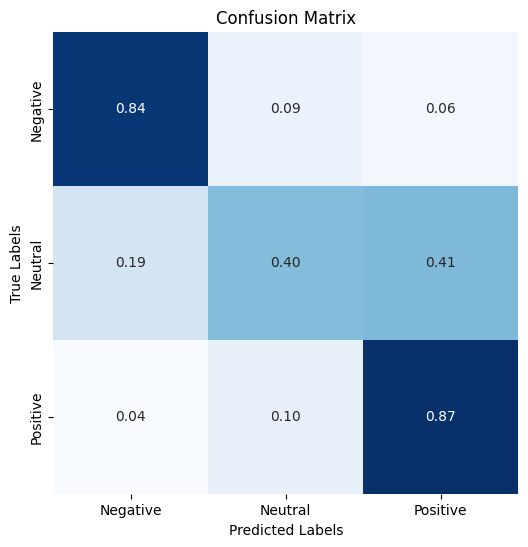

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, labels):
    plt.figure(figsize=(6, 6))
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    sns.heatmap(
        cm,
        annot=True,
        cmap='Blues',
        cbar=False,
        fmt='.2f',
        xticklabels=labels,
        yticklabels=labels
    )
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

# Example usage
labels = ['Negative', 'Neutral', 'Positive']  # Update with your actual labels
plot_cm(y_test, y_preds_test, labels)


In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

def text_preprocessor(review):
    # Example preprocessing function (you may need to adjust this)
    # Lowercase, remove punctuation, etc.
    review = review.lower()
    review = re.sub(r'<.*?>', '', review)  # Remove HTML tags
    review = review.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    review = re.sub(r'\d+', '', review)  # Remove digits
    review = re.sub(r'\s+', ' ', review).strip()  # Remove extra whitespace
    return review

def get_sentiment(review):
    # Preprocess the review
    x = text_preprocessor(review)

    # Vectorization
    x = tfidf_vectorizer.transform([x])

    # Prediction
    y = bmodel.predict(x)  # Returns an array of predictions
    y = y[0]  # Extract the first element from the array
    # print(y)
    return y

# Test the function with example reviews
positive_review = "This chips packet is very tasty. I highly recommend this!"
negative_review = "This product is a waste of money"

print(f"This is a {get_sentiment(positive_review)} review!")
print(f"This is a {get_sentiment(negative_review)} review!")


This is a Positive review!
This is a Negative review!


In [ ]:
# Example reviews for testing
test_reviews = reviews = [
    "I absolutely loved this product! It exceeded my expectations in every way.",
    "The customer service was fantastic, and the item arrived earlier than expected. Highly recommend!",
    "Excellent quality and great value for money. Will definitely purchase again.",
    "The product is okay, but it didn't stand out in any way.",
    "Received the item as described, but the delivery took a bit longer than expected.",
    "The product works fine, but I had issues with the installation.",
    "Terrible experience. The product broke after one use and customer service was unhelpful.",
    "The item did not match the description at all. Very disappointed with the quality.",
    "It was a complete waste of money. The product did not perform as advertised and I regret buying it.",
    "The product arrived on time and was well-packaged, but it didn't meet my expectations.",
    "Great purchase! The product is exactly as described and works perfectly.",
    "The quality of the product is subpar, and I had issues with the customer service.",
    "Not worth the price. The product is mediocre and doesn't live up to the hype.",
    "Fantastic value for money. The product is well-made and performs well.",
    "The product broke down after a week of use. Very disappointed.",
    "Good product, but the customer service experience was lacking.",
    "The item was good but had a minor defect. It still works fine though.",
    "I was expecting more based on the reviews. The product is just average.",
    "Excellent product with fast delivery. I will definitely buy again."
]


# Test the function with example reviews
for review in test_reviews:
    print(f"Review: '{review}'")
    print(f"Sentiment: {get_sentiment(review)}")
    print()


Review: 'I absolutely loved this product! It exceeded my expectations in every way.'
Sentiment: Positive

Review: 'The customer service was fantastic, and the item arrived earlier than expected. Highly recommend!'
Sentiment: Positive

Review: 'Excellent quality and great value for money. Will definitely purchase again.'
Sentiment: Positive

Review: 'The product is okay, but it didn't stand out in any way.'
Sentiment: Neutral

Review: 'Received the item as described, but the delivery took a bit longer than expected.'
Sentiment: Neutral

Review: 'The product works fine, but I had issues with the installation.'
Sentiment: Positive

Review: 'Terrible experience. The product broke after one use and customer service was unhelpful.'
Sentiment: Negative

Review: 'The item did not match the description at all. Very disappointed with the quality.'
Sentiment: Negative

Review: 'It was a complete waste of money. The product did not perform as advertised and I regret buying it.'
Sentiment: Negative

In [ ]:
# Check the distribution of predictions
print(pd.Series(y_preds_test).value_counts())


Positive    853
Negative    198
Neutral     149
Name: count, dtype: int64


In [ ]:
import pickle

# Save the model
with open('/content/bmodel.pkl', 'wb') as file:
    pickle.dump(bmodel, file)


In [ ]:
from google.colab import files

# Download the model
files.download('/content/bmodel.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle

# Save the TfidfVectorizer
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)


In [ ]:
from flask import Flask, request, jsonify
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import re
import string

app = Flask(__name__)

def text_preprocessor(review):
    review = review.lower()
    review = re.sub(r'<.*?>', '', review)  # Remove HTML tags
    review = review.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    review = re.sub(r'\d+', '', review)  # Remove digits
    review = re.sub(r'\s+', ' ', review).strip()  # Remove extra whitespace
    return review

def get_sentiment(review):
    x = text_preprocessor(review)
    x = tfidf_vectorizer.transform([x])
    y = bmodel.predict(x)
    return y[0]  # Assuming model returns a label directly

@app.route('/analyze_sentiment', methods=['POST'])
def analyze_sentiment():
    data = request.json
    reviews = data.get('reviews', [])

    # Initialize sentiment counters
    sentiment_counts = {'positive': 0, 'neutral': 0, 'negative': 0}

    for review in reviews:
        sentiment = get_sentiment(review)
        if sentiment == 0:
            sentiment_counts['negative'] += 1
        elif sentiment == 1:
            sentiment_counts['neutral'] += 1
        elif sentiment == 2:
            sentiment_counts['positive'] += 1

    return jsonify(sentiment_counts)

if __name__ == '__main__':
    app.run(host='0.0.0.0', debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
